In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load package
from pyGRBaglow.reddening import reddening

## From Pei 1992
http://adsabs.harvard.edu/abs/1992ApJ...395..130P

In [4]:
# Define the wavelengh range in angtrom
wavelength=np.linspace(1e2,3e4,1e4)

In [5]:
#Define the redshift
z=0

In [6]:
#Define the amout of extinction in the Host galaxy
Ab=0.2

In [7]:
#Define all the available extinction laws
ext_laws=['MW','LMC','SMC']

In [8]:
Alambda_over_Ab=[]
trans=[]
for law in ext_laws:
    Alambda_over_Ab.append(reddening(wavelength,z,Ab).Pei92(law=law)[0])
    trans.append(reddening(wavelength,z,Ab).Pei92(law=law)[1])

<IPython.core.display.Javascript object>


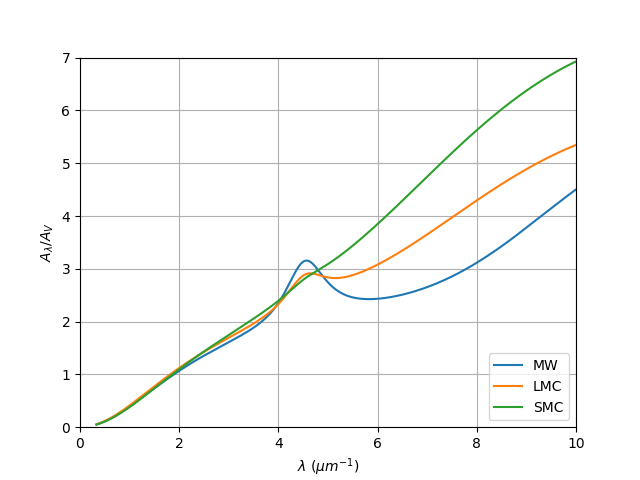

In [9]:
#Plot all extinction laws in microns^-1
plt.figure()
for i,x in enumerate(Alambda_over_Ab):
    plt.plot(1/(wavelength*1e-4),x,label='%s' % ext_laws[i])
plt.xlabel(r'$\lambda$ ($\mu m ^{-1}$)')
plt.ylabel(r'$A_{\lambda} / A_{V}$')
plt.legend(loc='lower right')
plt.xlim(0,10)
plt.ylim(0,7)
plt.grid(True)
plt.savefig('ext_law_Pei.png')

In [ ]:
#Plot all extinction laws in microns
plt.figure()
for i,x in enumerate(Alambda_over_Ab):
    plt.plot(wavelength*1e-4,x,label='%s' % ext_laws[i])
plt.xlabel(r'$\lambda$ ($\mu m$)')
plt.ylabel(r'$A_{\lambda} / A_{V}$')
plt.legend(loc='lower right')

<IPython.core.display.Javascript object>


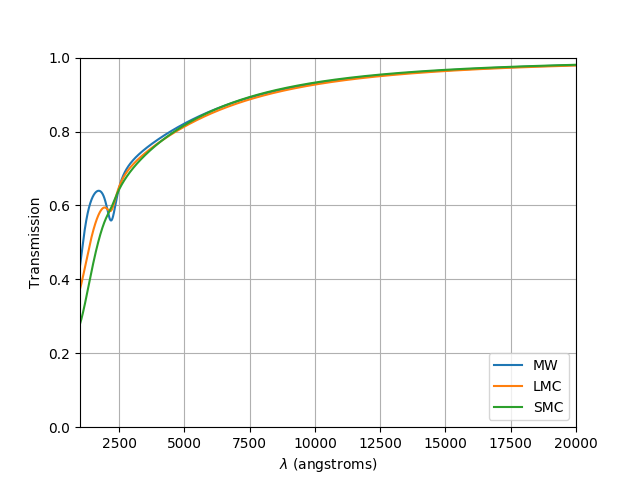

In [10]:
#Plot transmission corresponding to all extinction laws
plt.figure()
for i,x in enumerate(trans):
    plt.plot(wavelength,x,label='%s' % ext_laws[i])
plt.xlabel(r'$\lambda$ (angstroms)')
plt.ylabel('Transmission')
plt.legend(loc='lower right')
plt.xlim(1000,20000)
plt.ylim(0,1)
plt.grid(True)
plt.savefig('Trans_ext_law_Pei.png')

## From Li 2007
http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:0808.4115

In [11]:
# Define the wavelengh range in angtrom
wavelength=np.linspace(1000,2e4,10000)

In [12]:
#Define the redshift
z=0

In [13]:
#Define the amout of extinction in the Host galaxy
Av=0.2

In [14]:
#Define all the available extinction laws
ext_laws=['MW','LMC','SMC','linear','calzetti']#,'grb1','grb2']

In [15]:
Alambda_over_Av=[]
trans=[]
for law in ext_laws:
    Alambda_over_Av.append(reddening(wavelength,z,Av).Li07(law)[0])
    trans.append(reddening(wavelength,z,Av).Li07(law)[1])

<IPython.core.display.Javascript object>


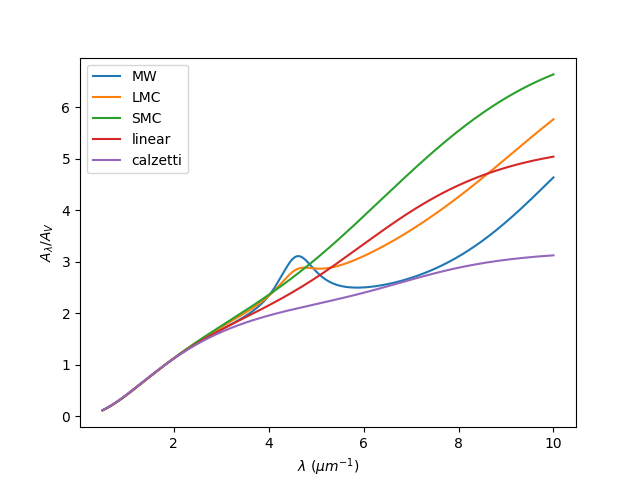

In [16]:
#Plot all extinction laws in microns^-1
plt.figure()
for i,x in enumerate(Alambda_over_Av):
    plt.plot(1/(wavelength*1e-4),x,label='%s' % ext_laws[i])
plt.xlabel(r'$\lambda$ ($\mu m ^{-1}$)')
plt.ylabel(r'$A_{\lambda} / A_{V}$')
plt.legend(loc='best')

The extinction is set to zero if returning negative value. 

<IPython.core.display.Javascript object>


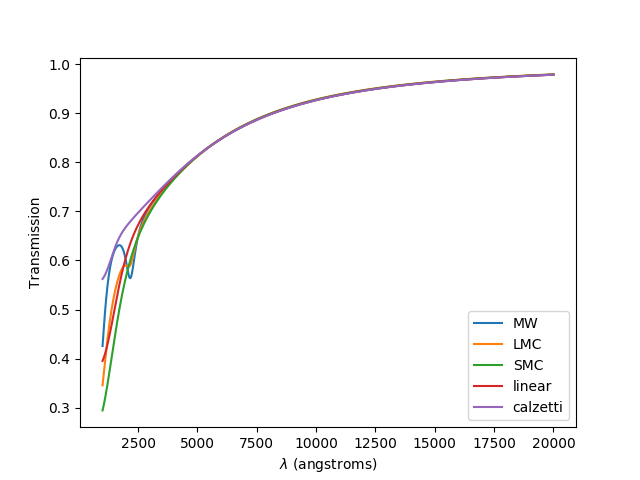

In [17]:
#Plot transmission corresponding to all extinction laws
plt.figure()
for i,x in enumerate(trans):
    plt.plot(wavelength,x,label='%s' % ext_laws[i])
plt.xlabel(r'$\lambda$ (angstroms)')
plt.ylabel('Transmission')
plt.legend(loc='lower right')

Be careful with the wavelength range, the above extinction laws are plotted with parameters fitted in the range 1-10 microns.

# Load IGM extinction
Meiksin 2006: http://adsabs.harvard.edu/abs/2006MNRAS.365..807M  
Madau 1995: http://adsabs.harvard.edu/abs/1995ApJ...441...18M

In [18]:
from pyGRBaglow.igm import meiksin, madau

In [19]:
# Define the wavelengh range in angtrom
wavelength=np.linspace(1000,1e4,1e4)

In [20]:
#Define the redshift
z=5

In [21]:
# Load IGM transmission from Meiksin 
trans_igm_meiksin=meiksin(wavelength/10,z)

In [22]:
# Load IGM transmission from Meiksin 
trans_igm_madau=madau(wavelength,z)

<IPython.core.display.Javascript object>


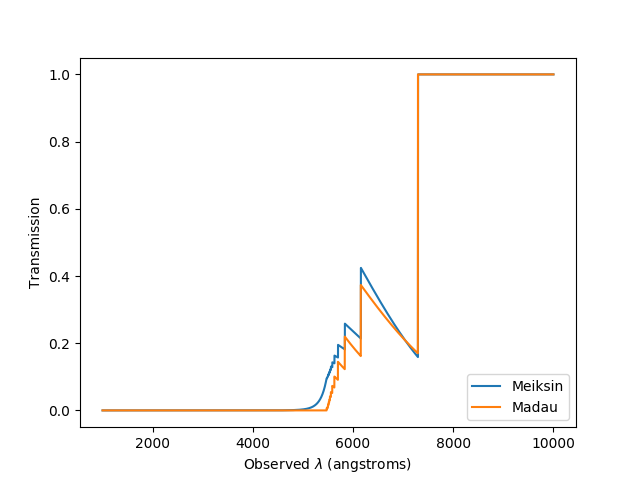

In [23]:
#Plot madau and meiksin IGM extinction
plt.figure()
plt.plot(wavelength,trans_igm_meiksin,label='Meiksin')
plt.plot(wavelength,trans_igm_madau,label='Madau')
plt.xlabel(r'Observed $\lambda$ (angstroms)')
plt.ylabel('Transmission')
plt.legend(loc='lower right')

## Difference Pei vs Li

In [24]:
# Define the wavelengh range in angtrom
wavelength=np.linspace(1000,1e5,10000)
wavelength2=np.linspace(100,1e5,10000)

In [25]:
#Define the redshift
z=0

In [26]:
#Define the amout of extinction in the Host galaxy
Av=0.2
Ab=0.2

In [27]:
#Define all the available extinction laws
ext_laws=['MW','LMC','SMC']#,'linear','calzetti']#,'grb1','grb2']
colors=['blue','green','red']

In [28]:
Alambda_over_Av=[]
Alambda_over_Av2=[]
for law in ext_laws:
    Alambda_over_Av.append(reddening(wavelength,z,Av).Li07(law)[0])
    Alambda_over_Av2.append(reddening(wavelength2,z,Av).Li07(law)[0])

In [29]:
Alambda_over_Ab=[]
Alambda_over_Ab2=[]
for law in ext_laws:
    Alambda_over_Ab.append(reddening(wavelength,z,Ab).Pei92(law=law)[0])
    Alambda_over_Ab2.append(reddening(wavelength2,z,Ab).Pei92(law=law)[0])

<IPython.core.display.Javascript object>


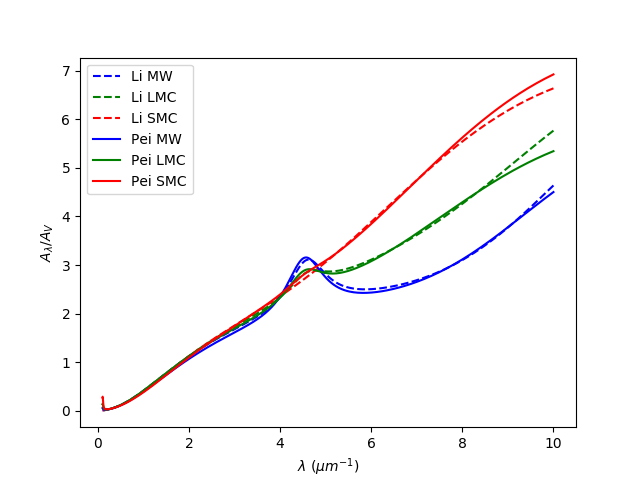

In [30]:
#Plot all extinction laws in microns^-1
plt.figure()
for i,x in enumerate(Alambda_over_Av):
    plt.plot(1/(wavelength*1e-4),x,label='Li %s' % ext_laws[i],ls='--',color=colors[i])
for i,x in enumerate(Alambda_over_Ab):
    plt.plot(1/(wavelength*1e-4),x,label='Pei %s' % ext_laws[i],color=colors[i])
plt.xlabel(r'$\lambda$ ($\mu m ^{-1}$)')
plt.ylabel(r'$A_{\lambda} / A_{V}$')
plt.legend(loc='best')

<IPython.core.display.Javascript object>


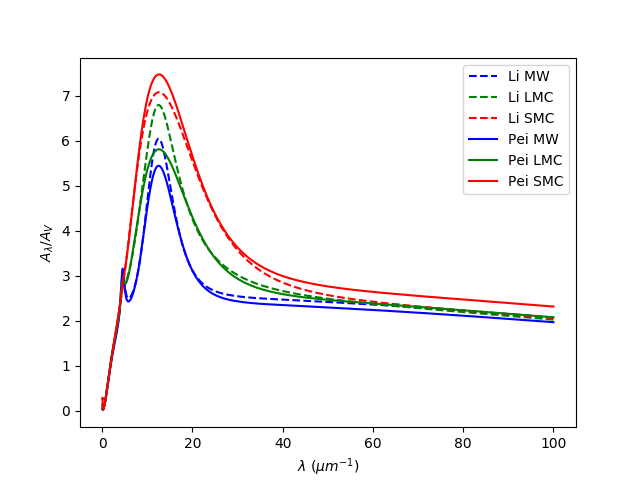

In [31]:
#Plot all extinction laws in microns^-1
plt.figure()
for i,x in enumerate(Alambda_over_Av2):
    plt.plot(1/(wavelength2*1e-4),x,label='Li %s' % ext_laws[i],ls='--',color=colors[i])
for i,x in enumerate(Alambda_over_Ab2):
    plt.plot(1/(wavelength2*1e-4),x,label='Pei %s' % ext_laws[i],color=colors[i])
plt.xlabel(r'$\lambda$ ($\mu m ^{-1}$)')
plt.ylabel(r'$A_{\lambda} / A_{V}$')
plt.legend(loc='best')

One can see that there is a difference between Li and Pei extinction laws at wavelengths below 0.2 microns (2000 angstroms) which will play a role when the SED is redshifted. This corresponds to big and very small grains, for instance included in the model of Pei at around 0.04 microns and 0.08 microns.

Even if they are normalised with Av for Li and Ab for Pei, it should not be responsibe for the difference.

The Lyman break at 912 angstrom will erase a bit the difference though, except at low redshift.

## Difference Pei, Li with IGM transmission

In [32]:
# Define the wavelengh range in angtrom
wavelength=np.linspace(1000,15000,10000)
wavelength2=np.linspace(1,1000,10000)
wavelength3=np.linspace(1*1e4,50*1e4,10000)

In [33]:
#Define the redshift
z=0

In [34]:
#Define the amout of extinction in the Host galaxy
Av=0.2
Ab=0.2

In [35]:
#Define all the available extinction laws
ext_laws=['MW','LMC','SMC']#,'linear','calzetti']#,'grb1','grb2']
colors=['blue','green','red']

In [36]:
trans_Li=[]
trans_Li2=[]
trans_Li3=[]

for law in ext_laws:
    trans_Li.append(reddening(wavelength,z,Av).Li07(law)[1])
    trans_Li2.append(reddening(wavelength2,z,Av).Li07(law)[1])
    trans_Li3.append(reddening(wavelength3,z,Av).Li07(law)[1])

In [37]:
trans_Pei=[]
trans_Pei2=[]
trans_Pei3=[]

for law in ext_laws:
    trans_Pei.append(reddening(wavelength,z,Ab).Pei92(law=law)[1])
    trans_Pei2.append(reddening(wavelength2,z,Ab).Pei92(law=law)[1])
    trans_Pei3.append(reddening(wavelength3,z,Ab).Pei92(law=law)[1])

In [38]:
# Load IGM transmission from Meiksin 
trans_igm_meiksin=meiksin(wavelength/10,z)
trans_igm_meiksin2=meiksin(wavelength2/10,z)
trans_igm_meiksin3=meiksin(wavelength3/10,z)

<IPython.core.display.Javascript object>


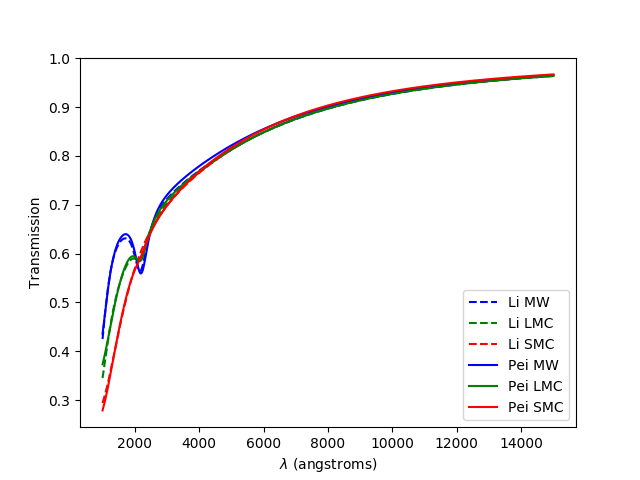

In [39]:
#Plot meiksin IGM extinction + Pei and Li LMC, SMC, MW
plt.figure()
for i,x in enumerate(trans_Li):
    plt.plot(wavelength,trans_igm_meiksin*x,label='Li %s' % ext_laws[i],ls='--',color=colors[i])
for i,x in enumerate(trans_Pei):
    plt.plot(wavelength,trans_igm_meiksin*x,label='Pei %s' % ext_laws[i],color=colors[i])
plt.xlabel(r'$\lambda$ (angstroms)')
plt.ylabel('Transmission')
plt.legend(loc='lower right')

In [ ]:
#Plot meiksin IGM extinction + Pei and Li LMC, SMC, MW
plt.figure()
for i,x in enumerate(trans_Li2):
    plt.plot(wavelength2,trans_igm_meiksin2*x,label='Li %s' % ext_laws[i],ls='--',color=colors[i])
for i,x in enumerate(trans_Pei2):
    plt.plot(wavelength2,trans_igm_meiksin2*x,label='Pei %s' % ext_laws[i],color=colors[i])
plt.xlabel(r'$\lambda$ (angstroms)')
plt.ylabel('Transmission')
#plt.xlim([20000,100000])
#plt.ylim([0.95,1])
plt.legend(loc='best')

<IPython.core.display.Javascript object>


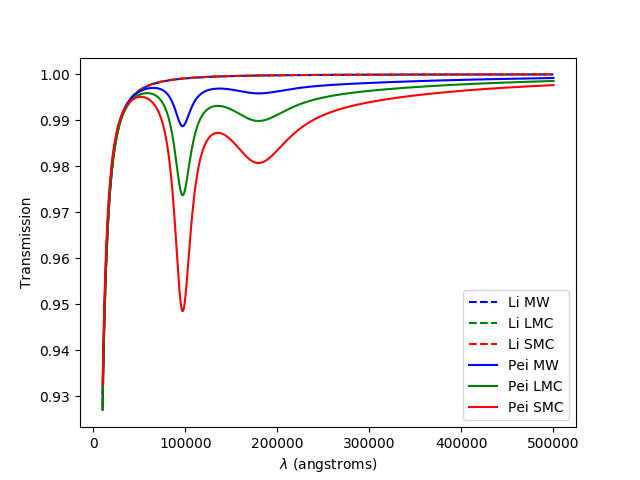

In [40]:
#Plot meiksin IGM extinction + Pei and Li LMC, SMC, MW
plt.figure()
for i,x in enumerate(trans_Li3):
    plt.plot(wavelength3,trans_igm_meiksin3*x,label='Li %s' % ext_laws[i],ls='--',color=colors[i])
for i,x in enumerate(trans_Pei3):
    plt.plot(wavelength3,trans_igm_meiksin3*x,label='Pei %s' % ext_laws[i],color=colors[i])
plt.xlabel(r'$\lambda$ (angstroms)')
plt.ylabel('Transmission')
plt.legend(loc='best')

# Photoelectric absorption

Cross sections from Morrison and McCammon 1983: http://adsabs.harvard.edu/abs/1983ApJ...270..119M

In [41]:
from pyGRBaglow.reddening import reddening

In [42]:
wavelength=np.logspace(-7,12,1e4) #in angstroms

In [43]:
redshift=5
#Amount of extinction in V band in units mag
Av=0.2
#Metal column density in Host galaxy in units 1e22 cm-2/mag
NHX=1
#THe metal-to-dust ratio in the Milky Way lies between 0.17 to 0.22 1e21 cm-2
# High z GRB lines of sight shows values up to a few 1e22 cm

In [44]:
#Compute gas extinction in Host galaxy and milky way
trans_photabs_host = reddening(wavelength,redshift,Av=Av).gas_absorption(NHx=NHX)
trans_photabs_mw = reddening(wavelength,0,Av=Av).gas_absorption()

<IPython.core.display.Javascript object>


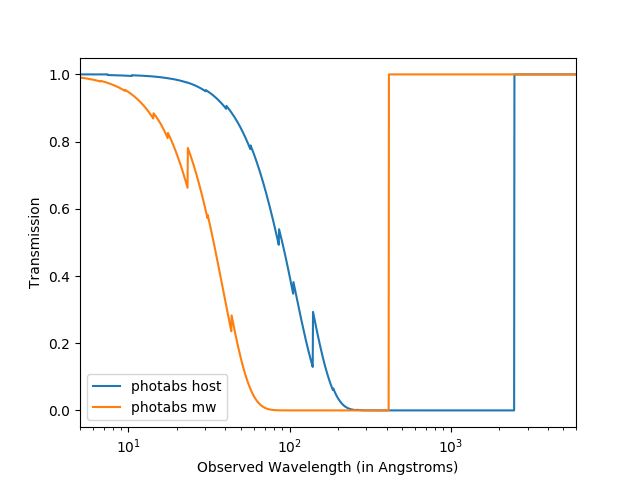

(5.0, 6000.0)

In [45]:
plt.figure()
plt.plot(wavelength,trans_photabs_host,label='photabs host')
plt.plot(wavelength,trans_photabs_mw,label='photabs mw')
plt.ylabel('Transmission')
plt.xlabel('Observed Wavelength (in Angstroms)')
plt.legend(loc='best')
plt.xscale('log')
plt.xlim([5e0,1e3*(redshift+1)])